In [0]:
import pandas as pd
from sklearn import linear_model

In [3]:
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


In [4]:
one_hot_df = pd.get_dummies(df, prefix=['city'])

one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [0]:
lin_reg = linear_model.LinearRegression()

In [7]:
lin_reg.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [9]:
lin_reg.intercept_

3333.3333333333335

In [0]:
# One-hot encoding weights + intercept
w1 = lin_reg.coef_
b1 = lin_reg.intercept_

In [11]:
df['Rent'].mean()

3333.3333333333335

In [12]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [13]:
lin_reg.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lin_reg.coef_

array([  500., -1000.])

In [15]:
lin_reg.intercept_

3500.0

In [0]:
# Dummy coding weights + intercept
w2 = lin_reg.coef_
b2 = lin_reg.intercept_

In [0]:
effect_df = dummy_df.copy()

In [18]:
effect_df.loc[3:5, ['city_SF', 'city_Seattle']] = -1.0
effect_df

,Rent,city_SF,city_Seattle
0,3999,1.0,0.0
1,4000,1.0,0.0
2,4001,1.0,0.0
3,3499,-1.0,-1.0
4,3500,-1.0,-1.0
5,3501,-1.0,-1.0
6,2499,0.0,1.0
7,2500,0.0,1.0
8,2501,0.0,1.0


In [19]:
lin_reg.fit(effect_df[['city_SF', 'city_Seattle']], effect_df['Rent'])
lin_reg.coef_

array([ 666.66666667, -833.33333333])

In [20]:
lin_reg.intercept_

3333.3333333333335

In [0]:
# illustration of rental price in cities
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)

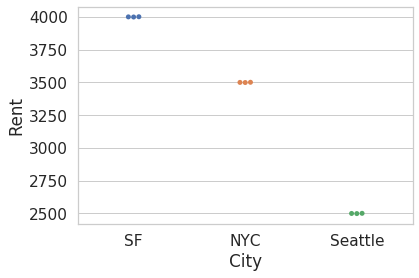

In [22]:
sns.swarmplot(x="City", y="Rent", data=df);

In [23]:
print('One-hot encoding weights: ' ,w1, ' and intercept: ', b1)
print('Dummy encoding weights: ' ,w2, ' and intercept: ', b2)

One-hot encoding weights:  [ 166.66666667  666.66666667 -833.33333333]  and intercept:  3333.3333333333335
Dummy encoding weights:  [  500. -1000.]  and intercept:  3500.0


In [24]:
# geometry of one-hot vs. dummy encoding

# Create a list of values in the best fit line for one-hot encoding
one_hot_y = [((w1[0] * one_hot_df.city_NYC[i]) + 
              (w1[1] * one_hot_df.city_SF[i]) +
              (w1[2] * one_hot_df.city_Seattle[i]) + b1) 
             for i in range(0,one_hot_df.shape[0])]

# Create a list of values in the best fit line for dummy coding
dummy_y = [((w2[0] * dummy_df.city_SF[i]) +
            (w2[1] * dummy_df.city_Seattle[i]) + b2)
           for i in range(0,dummy_df.shape[0])]

print(one_hot_y)
print(dummy_y)

[4000.0, 4000.0, 4000.0, 3500.0000000000005, 3500.0000000000005, 3500.0000000000005, 2500.0, 2500.0, 2500.0]
[4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]
